In [1]:
step=91
extent="intra" #"intra") #inter or intra # irrelevant for MovingWindow
Dataset='Jake'
var_names = ["Rg","T","NEE","VPD","H","LE"]
nv=len(var_names)
tau_min=0
tau_max=5
min_len=5
attribute2='_RgNotDriver'


In [2]:
alpha_level=0.1

In [3]:
import numpy as np
import matplotlib
import os
import pandas as pd
#matplotlib.use('PDF')
from matplotlib import pyplot as plt
from tigramite import plotting as tp
from tigramite.data_processing import DataFrame
import xarray as xr


import scipy
import sklearn
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.preprocessing import scale

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import os


#import geopandas as gpd
#import geoplot as gplt

from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.metrics import pairwise_distances

import seaborn as sns

In [4]:
cont_links_agg=[]
lag_links_agg=[]
matrix=np.zeros((nv,nv,tau_max-tau_min+1),'U8')
for i,d in enumerate(var_names):
    for j,r in enumerate(var_names):
        #for t in [0,1,2,3,4,5]:
        #labels.append(d + "→" +r+':1-6')
        cont_links_agg.append(d + "→" +r+':0')
        lag_links_agg.append(d + "→" +r+':1-%s'%(tau_max))
           # matrix[i,j,t]=d + "→" +r+str(t)

lag_links_agg_red=[]
for i,link in enumerate(lag_links_agg):
 #   if not link[:link.index('→')] in link[link.index('→'):]:
        if not 'Rg' in link[link.index('→'):]:
            lag_links_agg_red.append(link)

lag_links_agg_red_noAC=[]
for i,link in enumerate(lag_links_agg):
    if not link[:link.index('→')] in link[link.index('→'):]:
        if not 'Rg' in link[link.index('→'):]:
            lag_links_agg_red.append(link)

cont_links_agg_red=[]
for i,link in enumerate(cont_links_agg):
    if not link[:link.index('→')] in link[link.index('→'):]:
        if not 'Rg' in link[link.index('→'):]:
            if  link[link.index('→')+1:link.index(':')] + '→' + link[:link.index('→')] +':0' not in cont_links_agg_red:
                cont_links_agg_red.append(link)
                
cont_links_agg_red_NEE=[]
cont_links_agg_red_NEE=[link for link in cont_links_agg_red if 'NEE' in link]

cont_links_agg_red_noNEE=[]
cont_links_agg_red_noNEE=[link for link in cont_links_agg_red if 'NEE' not in link]

cont_links_agg_red_NEELE=[]
cont_links_agg_red_NEELE=[link for link in cont_links_agg_red if 'NEE' in link or 'LE' in link ]

cont_links_agg_red_noNEELE=[]
cont_links_agg_red_noNEELE=[link for link in cont_links_agg_red if 'NEE' not in link and 'LE' not in link]

In [5]:
cont_links_agg_red

['Rg→T:0',
 'Rg→NEE:0',
 'Rg→VPD:0',
 'Rg→H:0',
 'Rg→LE:0',
 'T→NEE:0',
 'T→VPD:0',
 'T→H:0',
 'T→LE:0',
 'NEE→VPD:0',
 'NEE→H:0',
 'NEE→LE:0',
 'VPD→H:0',
 'VPD→LE:0',
 'H→LE:0']

In [6]:
data=pd.read_csv("../Data/df_val_q_t_y_m_%s_%s_%s_%s_%s_%s%s_Tier1.csv" % (Dataset,extent,step,tau_max,min_len,alpha_level,attribute2),index_col=0)
#data.columns.values[49:265]=data.columns.values[49:265].astype(int)


In [13]:
#data=pd.read_csv("../../Decoupling_ET-GPP/Outputs/GinGin_MovingWindow.csv", index_col=0)


# Optics clustering dimred space

In [7]:
from sklearn.cluster import OPTICS, DBSCAN
import matplotlib.gridspec as gridspec

In [8]:
%matplotlib inline

In [8]:
j=30
dimRedType='TSNE_cont_links_agg_red_%s'%j


In [17]:
data

,Rg_mean_y,T_mean_y,NEE_mean_y,VPD_mean_y,H_mean_y,LE_mean_y,P_mean_y,GPP_mean_y,Tower,lon,...,PeakGrowingMonth,PeakGrowingMonth_Year,KoeppenGeigerType,KoeppenGeigerGroup,KoeppenGeigerSpec,StandAge,TSNE_cont_links_agg_red_301,TSNE_cont_links_agg_red_302,Clustering_TSNE_cont_links_agg_red_30,Median_TSNE_cont_links_agg_red_30_Space_TowerSeason
0,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,0.0,26.0,4.0,Dfb,NaN,68.775960,-55.743680,0.0,False
1,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,0.0,26.0,4.0,Dfb,NaN,25.746113,59.297290,-1.0,False
2,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,0.0,26.0,4.0,Dfb,NaN,32.760124,49.467220,-1.0,False
3,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,0.0,26.0,4.0,Dfb,NaN,31.426302,48.628014,1.0,False
4,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,1.0,1.0,26.0,4.0,Dfb,NaN,27.632040,36.928986,1.0,False
5,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,0.0,26.0,4.0,Dfb,NaN,27.274206,36.579220,1.0,False
6,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,0.0,26.0,4.0,Dfb,NaN,27.771475,37.539932,1.0,False
7,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,0.0,26.0,4.0,Dfb,NaN,43.634410,39.385290,1.0,False
8,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,0.0,26.0,4.0,Dfb,NaN,49.810337,31.937351,1.0,False
9,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,0.0,0.0,26.0,4.0,Dfb,NaN,83.488030,-46.746426,0.0,False


In [9]:
indices=data.index #['Median_TSNE_cont_links_agg_red_30_Space_TowerSeason']==False

#for i,k,w in [(7, 0.1, 60),
#(7, 0.1, 55),
#(7, 0.1, 50),
#(7, 0.1, 45) ,
#(7, 0.05, 60),
#(6.5, 0.1, 55),
#(6.5, 0.1,50),
##(6.5, 0.1, 45),
#(6.5, 0.05, 50),
#(6, 0.1, 45),
#(6, 0.1, 40)]:
       
for max_eps in [5,6,7,8]: #[6,6.2,6.4,6.6,6.8,7,7.2,7.4,7.6,7.8,8]:#[4.8,4.9,5,5.1,5.2]: #[0.01,0.02,0.03,0.04,0.05,0.1]: [40,45,50,55,60]: #
    for xi in [0.05,0.1,0.3,0.5,0.9]:
        for min_samples in [30,50,60,80]: # [85,90,95,100,105,110,115,120,125,130,135,140,150]:
                        
        #    print(i,w,xi)
            clustering2 = OPTICS(min_samples=min_samples, max_eps=max_eps,xi=xi,min_cluster_size=10).fit(data.loc[indices,[dimRedType+'1',dimRedType+'2']])
        #    clustering2 = DBSCAN(min_samples=w,eps=k).fit(data[[dimRedType+'1',dimRedType+'2']])
            
            if (5<clustering2.labels_.max()<55) & (np.sum(clustering2.labels_==-1)/len(clustering2.labels_) < 0.2):
                print(max_eps,min_samples,xi)
                data.loc[indices,'Clustering2']=clustering2.labels_


                # many tower plot
                #for j in [30]: #[2,5,10,20,50,100,200,500,1000,2000]: # [20,30,40,50,60,70,80,90,100,110]: # [2,10,20,40,60,100]: # [20,180,300,400,500,600,700,800,900,1000]: # [2,5,10,20,30,40,50,60,70,80,90,100]:
               # j=200
               # dimRedType='tSNEmeta3'
                dimRedType='TSNE_cont_links_agg_red_%s'%j
                #var='Rg_mean'
                for var in [2]:#dcor_vec_sort[0:16]:#,12,18,24,30,48,54,60,66,90,96,102,132,138,174]: #['T_mean','T_max','Season_num','P_mean','GPP_mean','lat','lon','Tower_num']:
                    print(j,var)
                    f,ax=plt.subplots(figsize=(10,10))
                    ax.set_facecolor('gray')    
                    data.loc[indices].plot.scatter(x=dimRedType+'1',y=dimRedType+'2',cmap='nipy_spectral',c='Clustering2',alpha=1,s=2, ax=ax)
                  #  data[data['Clustering']!=-1].plot.scatter(x=dimRedType+'1',y=dimRedType+'2',c='Clustering',cmap='nipy_spectral',alpha=0.4,s=50, marker='3', ax=ax)

                 #   data[data["Tower"]=="IT-PT1.DD.2002.2004.nc"].plot.scatter(x=dimRedType+'1',y=dimRedType+'2',s=200, marker='3',alpha=1, ax=ax)

                    ax.set_xlabel('t-SNE 1')
                    ax.set_ylabel('t-SNE 2')
            #        f.axes[1].set_ylabel("Month")

                   # f = plt.gcf()
                #    cax = f.get_axes()[1]
                 #   print((matrix.reshape(nv*nv*(tau_max-tau_min+1))[int(var)]))
               #     cax.set_ylabel(matrix.reshape(nv*nv*(tau_max-tau_min+1))[int(var)])
                  #  add_networks(dimRedType+'1',dimRedType+'2',data,networkexcerpt,0.08,6,f,0.07)
                  #  for i in data[data["Tower"]=="IT-PT1.DD.2002.2004.nc"].index:
                   #     ax.annotate(data.loc[i,'Year'], (data.loc[i,dimRedType+'1'],data.loc[i,dimRedType+'2']))

              #      for y in data[data["Tower"]=="IT-PT1.DD.2002.2004.nc"]["Year"].unique():
               #         path = mpath.Path(np.column_stack([data[data["Tower"]=="IT-PT1.DD.2002.2004.nc"][data["Year"]==y][dimRedType+'1'], data[data["Tower"]=="IT-PT1.DD.2002.2004.nc"][data["Year"]==y][dimRedType+'2']]))
                #        verts = path.interpolated(steps=3).vertices
                 #       x, y = verts[:, 0], verts[:, 1]
                  #      z= np.linspace(0, 1, len(x))
                   #     traj=colorline(x, y, z, cmap=plt.get_cmap('viridis'), linewidth=3,ax=ax, zorder=1)
                   # plt.colorbar(traj)
                    plt.show()

/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/sklearn/cluster/optics_.py:491: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  UserWarning)


KeyboardInterrupt: 

/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/sklearn/cluster/optics_.py:491: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  UserWarning)
/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/sklearn/cluster/optics_.py:491: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  UserWarning)


5 30 0.3
30 2


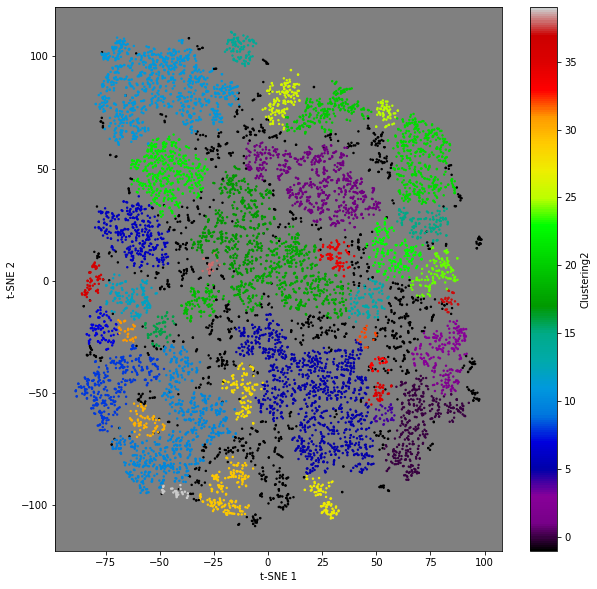

/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/sklearn/cluster/optics_.py:491: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  UserWarning)


5 30 0.5
30 2


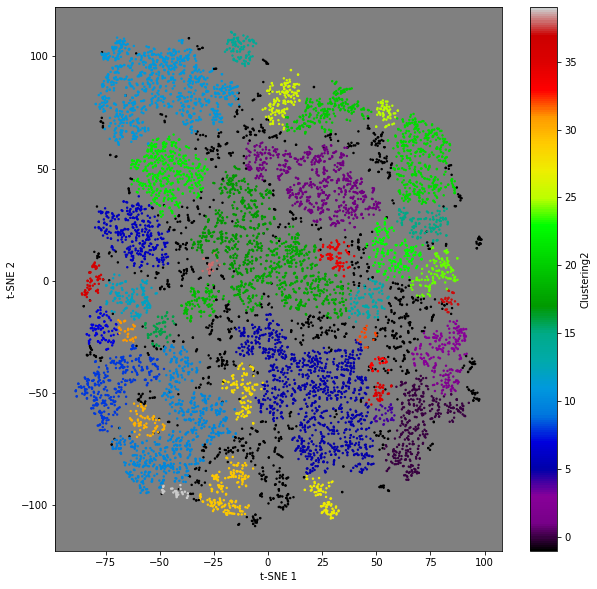

/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/sklearn/cluster/optics_.py:491: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  UserWarning)


5 30 0.9
30 2


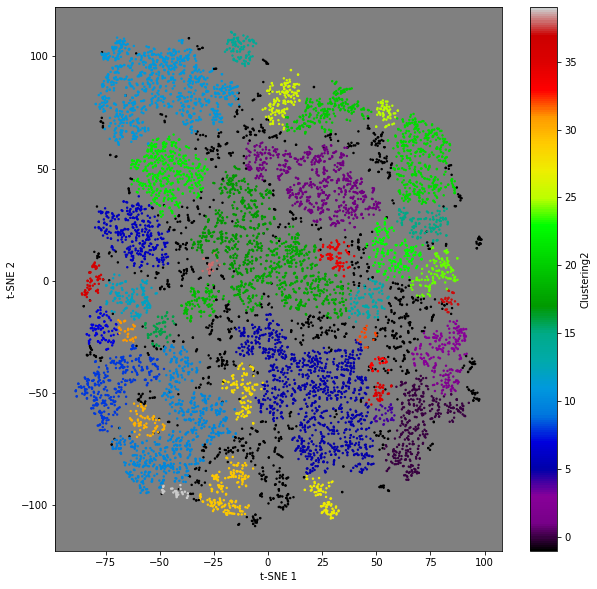

/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/sklearn/cluster/optics_.py:491: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  UserWarning)
/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/sklearn/cluster/optics_.py:491: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  UserWarning)
/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/sklearn/cluster/optics_.py:491: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  UserWarning)
/home/christopher/anaconda3/envs/tigraClustOldPandas/lib/python3.7/site-packages/sklearn/cluster/optics_.py:491: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  UserWarning)
/home/christopher/anaconda3/envs/tigraClustOldPandas/lib

7 50 0.1
30 2


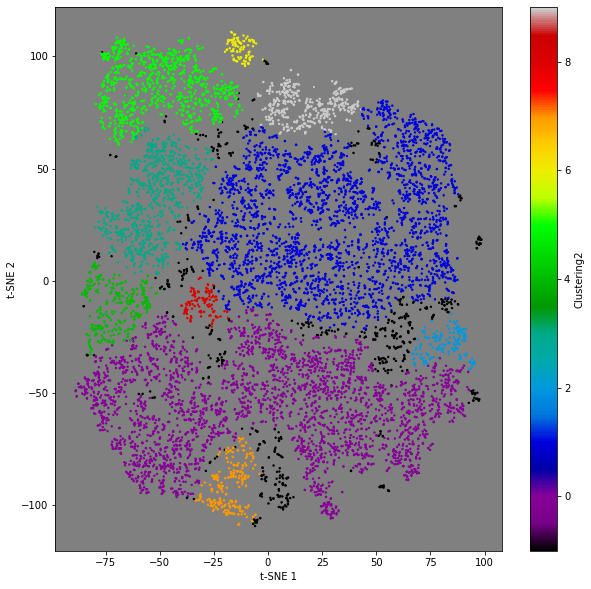

7 60 0.1
30 2


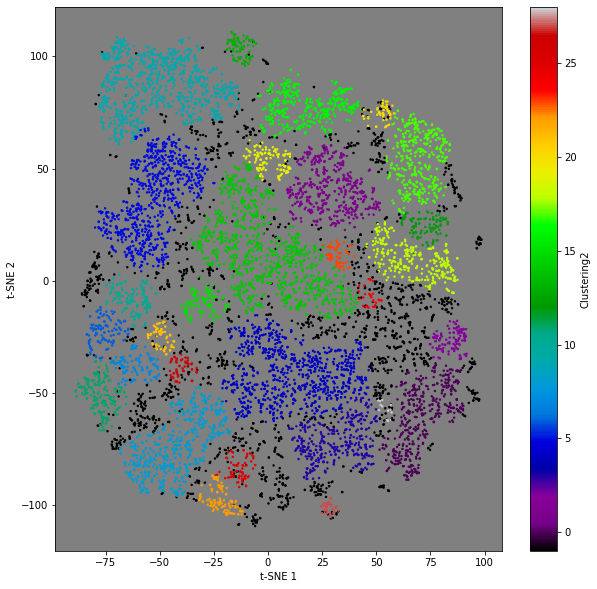

7 50 0.3
30 2


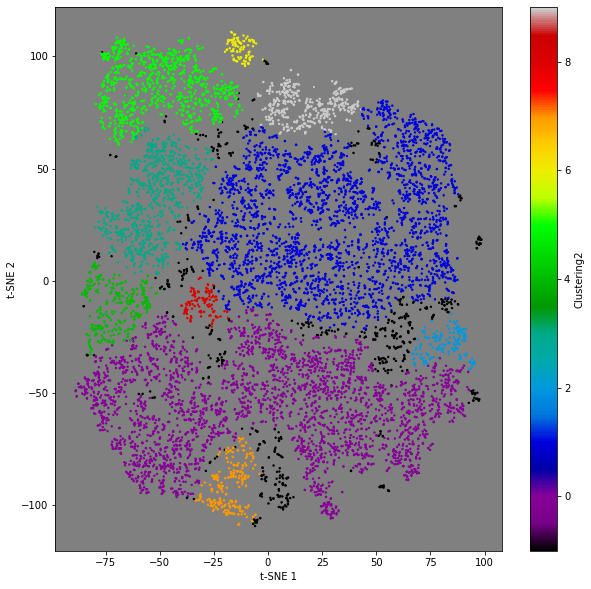

7 60 0.3
30 2


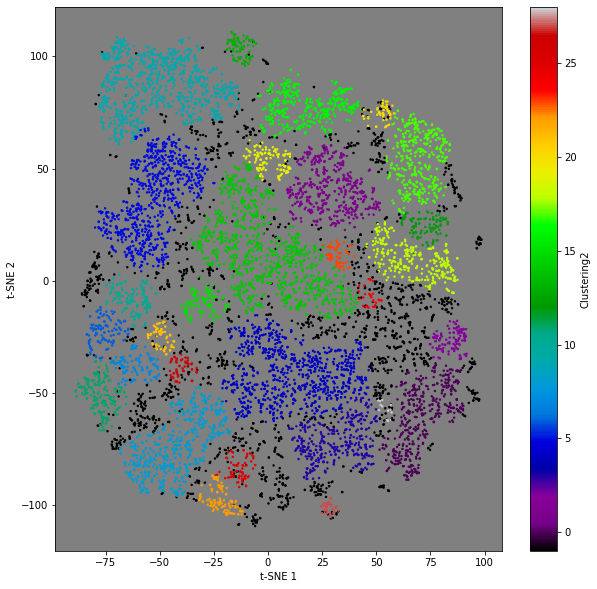

7 50 0.5
30 2


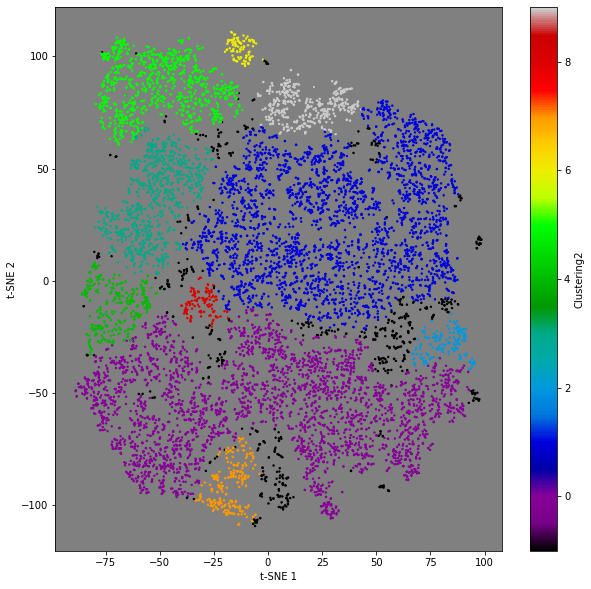

7 60 0.5
30 2


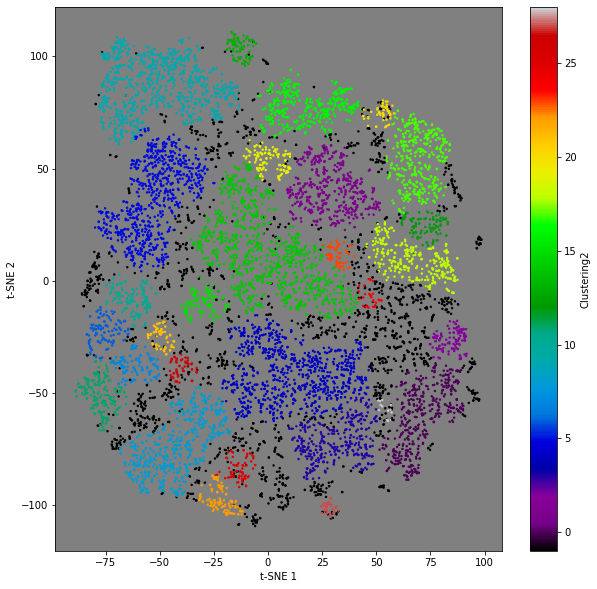

7 50 0.9
30 2


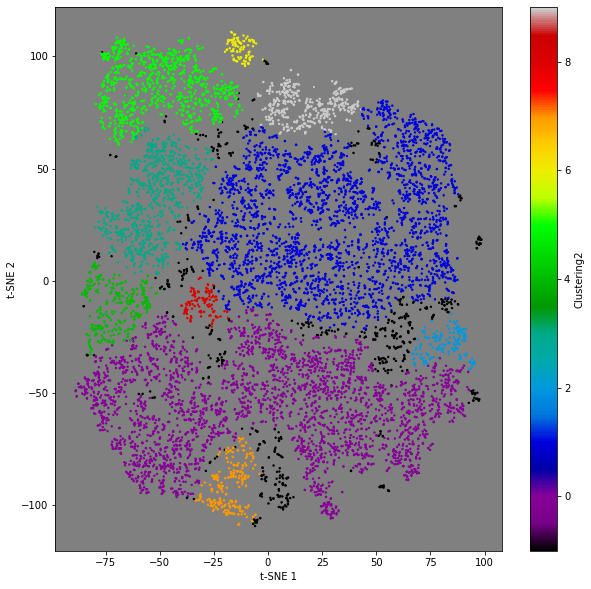

7 60 0.9
30 2


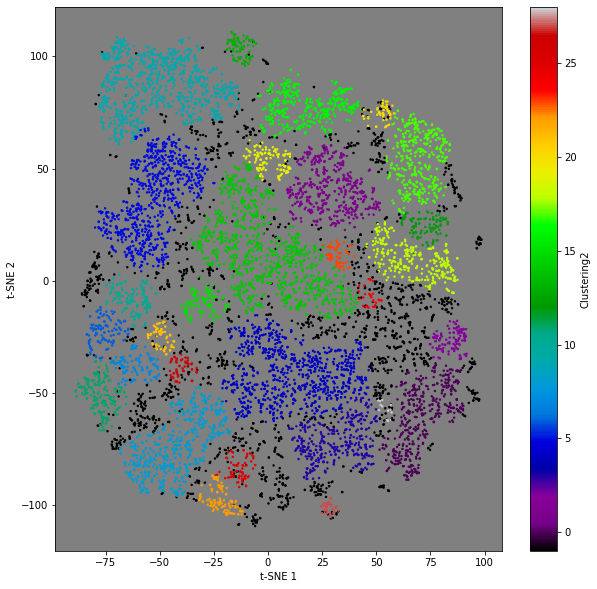

In [35]:
data.loc[indices].Tower.unique()

array(['AT-Neu.DD.2002.2012.nc', 'AU-ASM.DD.2010.2014.nc',
       'AU-Cpr.DD.2010.2014.nc', 'AU-DaP.DD.2007.2013.nc',
       'AU-DaS.DD.2008.2014.nc', 'AU-Dry.DD.2008.2014.nc',
       'AU-How.DD.2001.2014.nc', 'AU-Stp.DD.2008.2014.nc',
       'AU-Tum.DD.2001.2014.nc', 'AU-Wom.DD.2010.2014.nc',
       'BE-Bra.DD.1996.2014.nc', 'BE-Lon.DD.2004.2014.nc',
       'BE-Vie.DD.1996.2014.nc', 'BR-Sa3.DD.2000.2004.nc',
       'CA-Mer.DD.1998.2005.nc', 'CA-NS1.DD.2001.2005.nc',
       'CA-NS2.DD.2001.2005.nc', 'CA-NS3.DD.2001.2005.nc',
       'CA-NS5.DD.2001.2005.nc', 'CA-NS6.DD.2001.2005.nc',
       'CA-Qcu.DD.2001.2006.nc', 'CA-Qfo.DD.2003.2010.nc',
       'CA-SF2.DD.2001.2005.nc', 'CA-SF3.DD.2001.2006.nc',
       'CH-Cha.DD.2005.2014.nc', 'CH-Dav.DD.1997.2014.nc',
       'CH-Fru.DD.2005.2014.nc', 'CH-Lae.DD.2004.2014.nc',
       'CH-Oe1.DD.2002.2008.nc', 'CH-Oe2.DD.2004.2014.nc',
       'CZ-BK1.DD.2004.2014.nc', 'CZ-BK2.DD.2004.2012.nc',
       'CZ-wet.DD.2006.2014.nc', 'DE-Akm.DD.2009.2014.nc

In [11]:
dimRedType

'TSNE_cont_links_agg_red_30'

In [23]:
indices.sum()

10038

Text(0, 0.5, 't-SNE 2')

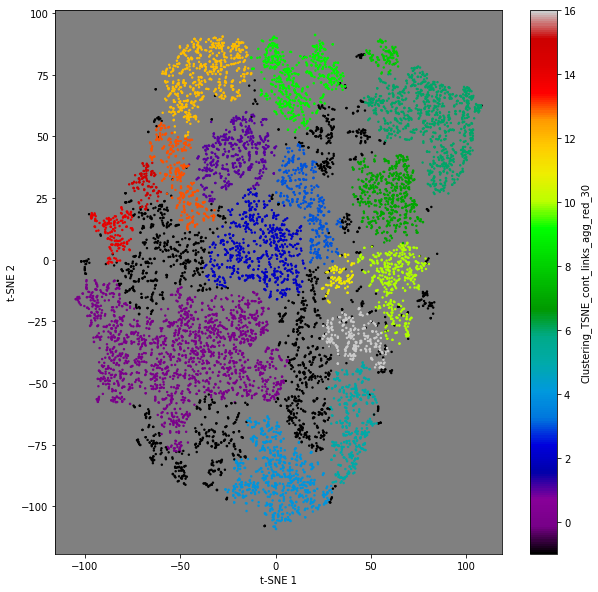

In [11]:
#indices=data['Median_TSNE_cont_links_agg_red_30_Space_TowerSeason']==False
clustering2 = OPTICS(min_samples=80, max_eps=8,xi=0.5).fit(data.loc[:,[dimRedType+'1',dimRedType+'2']])

data.loc[indices,'Clustering_%s'%dimRedType]=clustering2.labels_

f,ax=plt.subplots(figsize=(10,10))
ax.set_facecolor('gray')    
data.loc[indices].plot.scatter(x=dimRedType+'1',y=dimRedType+'2',cmap='nipy_spectral',c='Clustering_%s'%dimRedType,alpha=1,s=2, ax=ax)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')


In [12]:
data.to_csv("../Data/df_val_q_t_y_m_%s_%s_%s_%s_%s_%s%s_Tier1_Clustering80,8,0.1.csv" % (Dataset,extent,step,tau_max,min_len,alpha_level,attribute2))